<a href="https://colab.research.google.com/github/guifzy/analise_estatistica_dados/blob/main/series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pré-Processamento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/flat-ui__data-Fri Nov 08 2024.csv')
df.head()

,Source,Year,Mean
0,gcag,1850-01,-0.6746
1,gcag,1850-02,-0.3334
2,gcag,1850-03,-0.5913
3,gcag,1850-04,-0.5887
4,gcag,1850-05,-0.5088


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3823 non-null   object 
 1   Year    3823 non-null   object 
 2   Mean    3823 non-null   float64
dtypes: float64(1), object(2)
memory usage: 89.7+ KB


In [ ]:
df.isnull().sum()

,0
Source,0
Year,0
Mean,0


In [ ]:
df['Year'] = pd.to_datetime(df['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Source  3823 non-null   object        
 1   Year    3823 non-null   datetime64[ns]
 2   Mean    3823 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 89.7+ KB


In [ ]:
df

,Source,Year,Mean
0,gcag,1850-01-01,-0.6746
1,gcag,1850-02-01,-0.3334
2,gcag,1850-03-01,-0.5913
3,gcag,1850-04-01,-0.5887
4,gcag,1850-05-01,-0.5088
...,...,...,...
3818,GISTEMP,2023-08-01,1.1900
3819,GISTEMP,2023-09-01,1.4800
3820,GISTEMP,2023-10-01,1.3400
3821,GISTEMP,2023-11-01,1.4200


In [ ]:
df['Year'].value_counts()

,count
Year,
1937-04-01,2
1946-01-01,2
1946-12-01,2
1946-11-01,2
1946-10-01,2
...,...
1870-03-01,1
1870-04-01,1
1870-05-01,1


In [ ]:
# Removendo duplicatas
df = df.drop_duplicates(subset=['Year'])

In [ ]:
df['Year'].value_counts()

,count
Year,
1850-01-01,1
1967-04-01,1
1967-02-01,1
1967-01-01,1
1966-12-01,1
...,...
1907-10-01,1
1907-09-01,1
1907-08-01,1


In [ ]:
df = df.sort_values(by=['Year'])

In [ ]:
df = df.reset_index()
df = df.set_index('Year')

# Verificando a existência de uma série temporal.

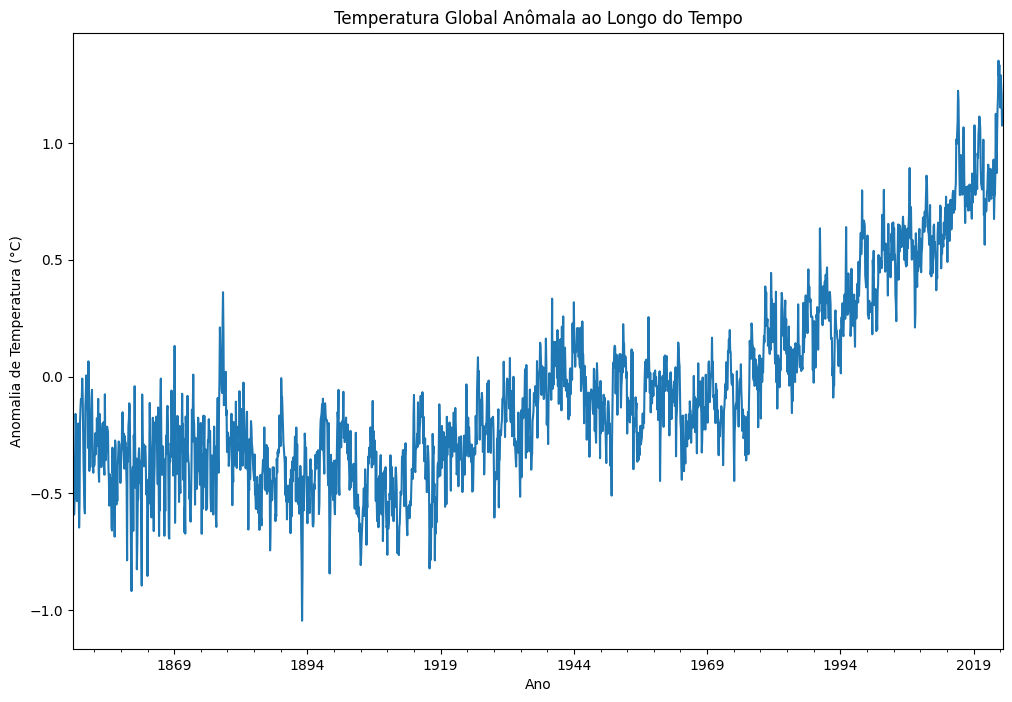

In [ ]:
plt.figure(figsize=(12, 8))
df['Mean'].plot(title="Temperatura Global Anômala ao Longo do Tempo")
plt.xlabel('Ano')
plt.ylabel('Anomalia de Temperatura (°C)')
plt.show()

> **Para calculos das metricas a seguir, será utilizado o método aditivo, $Y(t)=T(t)+S(t)+R(t)$, que geralmente é mais adequado para dados de temperatura e séries sem grandes variações na amplitude.**

- **Tendência:** média movel, assim, para um mês \( Y(t) \):
  
  $$
  T(t) = \frac{Y(t-5) + Y(t-4) + \dots + Y(t) + \dots + Y(t+4) + Y(t+5)}{12}
  $$
- **Sazonalidade:**  
  - Média de todos os valores observados em janeiro (para todos os anos),
  - Média de todos os valores observados em fevereiro (para todos os anos), e assim por diante até dezembro.

  $$
  S(\text{Janeiro}) = \frac{\sum_{\text{anos}} Y(\text{Janeiro})}{\text{número de anos}}
  $$
  
  Isso é repetido para todos os outros meses. O resultado é uma média que captura a sazonalidade mensal, ou seja, o padrão médio observado para cada mês ao longo dos anos.

- **Resíduo:** Captura a parte aleatória ou imprevisível da série, que sobra após remover a tendência e a sazonalidade.

  - Para séries temporais anuais com dados mensais:

$$
R(t) = Y(t) - T(t) - S(t)
$$

Ou seja, subtraímos do valor observado $ Y(t) $:
1. O valor da **tendência** $ T(t) $ para aquele mês (que representa a variação de longo prazo).
2. O valor da **sazonalidade** $ S(t) $ para aquele mês específico.


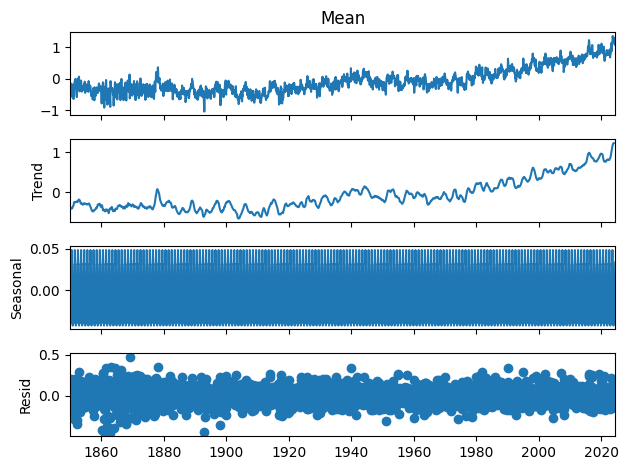

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Mean'], model='additive', period=12)
decomposition.plot()
plt.show()

**Informações Gerais:**
- O gráfico demonstra um aumento acentuado na tendência após os anos 1970, o que pode indicar um efeito acelerado do aquecimento global, possivelmente devido ao aumento nas emissões de gases de efeito estufa.
- Aqui a anomalia de temperatura anual pode ter uma variação, mas ela é relativamente sutil quando comparada ao aumento geral da temperatura global. Também,  é possível que o componente sazonal tenha valores que oscilam rapidamente de mês para mês, mas essas variações são mínimas.
- Os resíduos estão relativamente controlados, com todos muito próximos de uam média 0. Ademais, alguns valores apresentam uma queda incomum nos anos entre 1880 e 1900, o pode indicar eventos climáticos extremos.
  
**Conclusões:**
- A decomposição mostra uma tendência de aumento constante na anomalia de temperatura, isso reforça a evidência de aquecimento global. A inclinação e o formato da tendência sugerem que o aumento está acelerando com o tempo.
- As grandes ocilações de temperatura demonstram o início abrupto das mudanças climáticas em 1880 e o começo de uma preocupação mundial em relação ao aquecimento global.

# Teste de Estacionaridade

Agora, para ser possivel performar um modelo de como ARIMA e SARIMA, é necessário verificar a **estacionalidade**.

**Para estacionalidade:**
- **Média constante:** A média da série não muda ao longo do tempo.
- **Variância constante:** A dispersão dos dados em torno da média é constante.
- **Autocorrelação constante:** A relação entre os valores da série e seus atrasos (lags) não depende do tempo.

**Exemplo de séries:**

- **Estacionária:** Dados de temperaturas médias ajustadas que oscilam em torno de um ponto fixo.
- **Não estacionária:** Temperaturas globais que mostram um aumento constante (tendência de longo prazo) ou padrões sazonais.

> Para verificar a estacionalidade, irei performar o teste **Dickey-Fuller Aumentado (ADF)**

**Hipóteses do Teste ADF:**
- **Hipótese Nula ($ H_0 $)**: A série não é estacionária (possui uma raiz unitária).
- **Hipótese Alternativa ($ H_1 $)**: A série é estacionária.

**Modelo Geral do ADF:**

$$
\Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \sum_{i=1}^p \phi_i \Delta Y_{t-i} + \epsilon_t
$$

- $ \Delta Y_t $: Diferença de primeira ordem ($ Y_t - Y_{t-1} $).
- $ \alpha $: Intercepto (ou termo constante).
- $ \beta t $: Termo de tendência (opcional).
- $ \gamma $: Coeficiente do nível da série defasado ($ Y_{t-1} $).
- $ \phi_i $: Coeficientes das diferenças defasadas ($ \Delta Y_{t-i} $).
- $ \epsilon_t $: Termo de erro residual.
- $ p $: Número de defasagens incluídas no modelo.

> Para estimar os coeficientes ($ \alpha, \beta, \gamma, \phi_1, \phi_2, \ldots, \phi_p $), utilizamos **OLS:**

1. **Configuração das variáveis independentes ($ X $) e dependente ($ \Delta Y_t $):**
   - A variável dependente é $ \Delta Y_t $.
   - As variáveis independentes incluem:
     - Termo constante ($ \alpha $).
     - Termo de tendência ($ \beta t $), se incluído.
     - Termo defasado da série original ($ Y_{t-1} $).
     - Diferenças defasadas ($ \Delta Y_{t-1}, \Delta Y_{t-2}, \ldots, \Delta Y_{t-p} $).

2. **Cálculo da matriz dos coeficientes:**
   OLS resolve a equação:

   $$
   \hat{\beta} = (X^T X)^{-1} X^T Y
   $$

   Onde:
   - $ X $: Matriz das variáveis independentes.
   - $ Y $: Vetor da variável dependente ($ \Delta Y_t $).
   - $ \hat{\beta} $: Vetor dos coeficientes estimados ($ \alpha, \beta, \gamma, \phi_1, \ldots, \phi_p $).

**Estatística Dickey-Fuller**


$$
\text{ADF Statistic} = \frac{\hat{\gamma}}{\text{SE}(\hat{\gamma})}
$$

- $ \hat{\gamma} $: Coeficiente estimado para $ Y_{t-1} $.
- $ \text{SE}(\hat{\gamma}) $: Erro padrão da estimativa de $ \hat{\gamma} $, também calculado com base nos resíduos obtidos via OLS.







In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Mean'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Valores Críticos:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

if result[1] <= 0.05:
    print("A série é estacionária")
else:
    print("A série não é estacionária")

ADF Statistic: -0.15610730669153275
p-value: 0.9435552677387882
Valores Críticos:
	1%: -3.4335145392237445
	5%: -2.8629379486479962
	10%: -2.5675142037992775
A série não é estacionária


# Modelagem SARIMA

**Representação Matemática do SARIMA**

O modelo SARIMA pode ser descrito como:
$$
\Phi_P(L^m) \phi_p(L) (1 - L)^d (1 - L^m)^D X_t = \Theta_Q(L^m) \theta_q(L) \epsilon_t
$$

#### **Elementos da Equação:**
1. **Parte Não Sazonal:**
   - **$ \phi_p(L) $:** Parte autoregressiva (AR) não sazonal.
   - **$ \theta_q(L) $:** Parte de média móvel (MA) não sazonal.
   - **$ (1 - L)^d $:** Diferenciação não sazonal de ordem $ d $.

2. **Parte Sazonal:**
   - **$ \Phi_P(L^m) $:** Parte autoregressiva sazonal (SAR).
   - **$ \Theta_Q(L^m) $:** Parte de média móvel sazonal (SMA).
   - **$ (1 - L^m)^D $:** Diferenciação sazonal de ordem $ D $.

3. **$ L $:** Operador defasagem (lag operator):
   - $ L X_t = X_{t-1} $ (desloca a série em 1 período).
   - $ L^m X_t = X_{t-m} $ (desloca em $ m $ períodos, capturando sazonalidade).

4. **$ \epsilon_t $:** Termo de erro/resíduo (assume-se que segue ruído branco).

**Termos Resumidos:**
- **Parte não sazonal (ARIMA):**
  - AR(p): Regressão baseada em $ p $ defasagens não sazonais.
  - MA(q): Ajuste de erros com $ q $ defasagens.
  - $ d $: Número de diferenciações para estacionaridade não sazonal.
  
- **Parte sazonal:**
  - SAR(P): Regressão baseada em $ P $ defasagens sazonais.
  - SMA(Q): Ajuste de erros sazonais com $ Q $ defasagens.
  - $ D $: Número de diferenciações sazonais.
  - $ m $: Período sazonal.



# ACF e PACF

In [ ]:
# Importando SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
data = df['Mean']

<Figure size 1000x600 with 0 Axes>

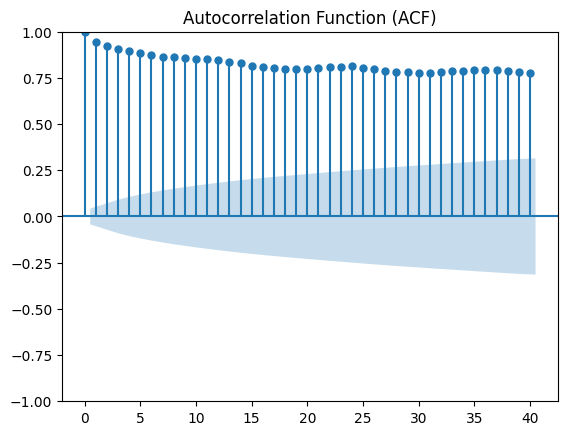

In [ ]:
# Plotando ACF
plt.figure(figsize=(10, 6))
plot_acf(data, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x600 with 0 Axes>

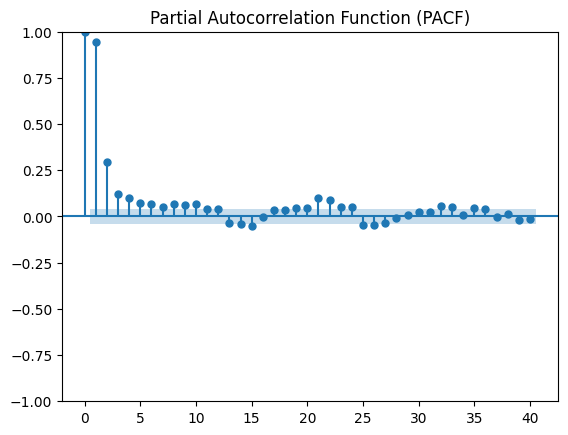

In [ ]:
# Plotando PACF
plt.figure(figsize=(10, 6))
plot_pacf(data, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Modelo

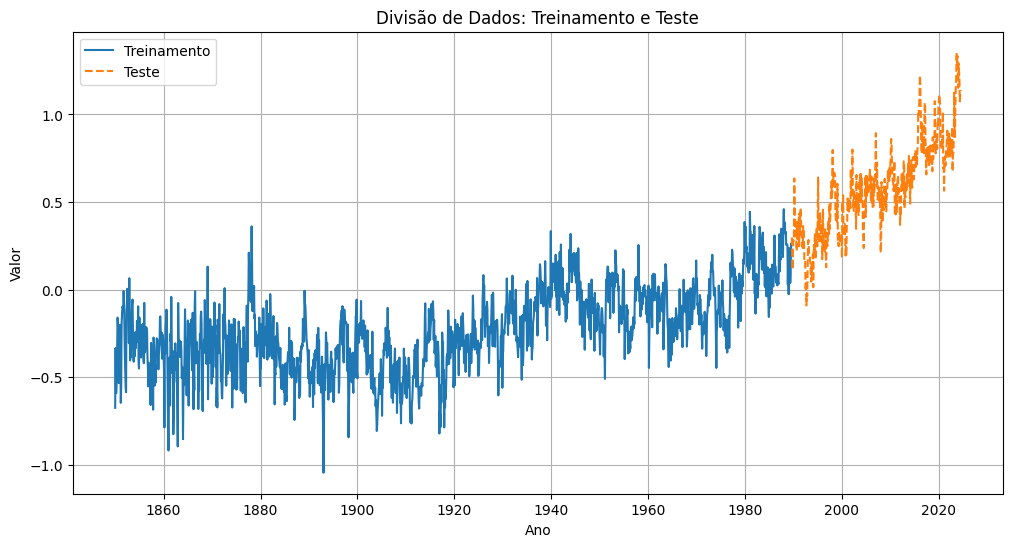

In [ ]:
train_size = int(len(df) * 0.8)  # 80% para treino, 20% para teste
train, test = df[:train_size], df[train_size:]

plt.figure(figsize=(12, 6))
plt.plot(train.index, train["Mean"], label="Treinamento")
plt.plot(test.index, test["Mean"], label="Teste", linestyle="--")
plt.legend()
plt.title("Divisão de Dados: Treinamento e Teste")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.grid()
plt.show()


In [ ]:
modelo = SARIMAX(
    train["Mean"],
    order=(1, 2, 1),  # (p, d, q)
    seasonal_order=(1, 1, 1, 6),  # P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq='MS'
)

modelo_treinado = modelo.fit()

print(modelo_treinado.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                              Mean   No. Observations:                 1676
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 6)   Log Likelihood                1044.106
Date:                           Fri, 22 Nov 2024   AIC                          -2078.212
Time:                                   04:50:50   BIC                          -2051.139
Sample:                               01-01-1850   HQIC                         -2068.177
                                    - 08-01-1989                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3263      0.020    -16.354      0.000      -0.365      -0.287
ma.L1         -1.0000      7.412     -0.135

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Erro Absoluto Médio (MAE): 0.11133122689022325
Raiz do Erro Quadrático Médio (RMSE): 0.14841786213306446
Coeficiente de Determinação (R²): 0.6831348272808788


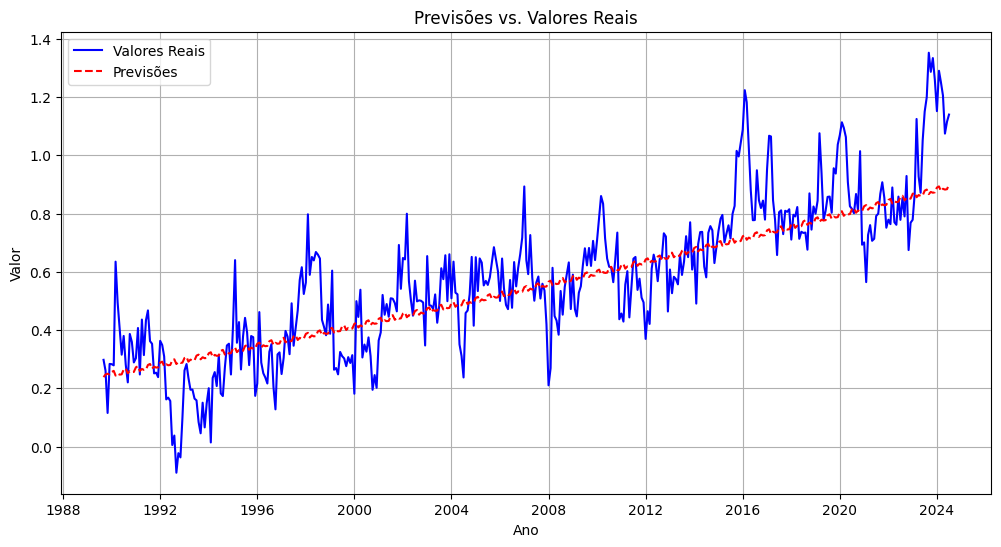

In [ ]:
forecast = modelo_treinado.forecast(steps=len(test))

mae = mean_absolute_error(test["Mean"], forecast)
mse = mean_squared_error(test["Mean"], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test["Mean"], forecast)
print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")
print(f"Coeficiente de Determinação (R²): {r2}")

plt.figure(figsize=(12, 6))
plt.plot(test.index, test["Mean"], label="Valores Reais", color='blue')
plt.plot(test.index, forecast, label="Previsões", linestyle="--", color='red')
plt.title("Previsões vs. Valores Reais")
plt.xlabel("Ano")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()

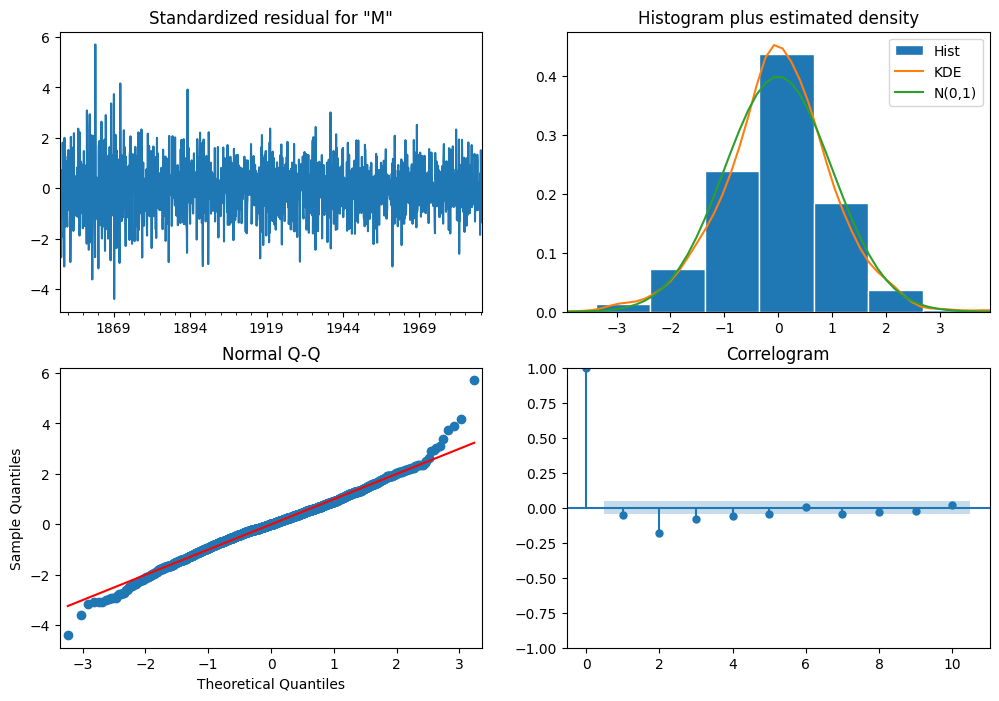

In [ ]:
modelo_treinado.plot_diagnostics(figsize=(12, 8))
plt.show()

# Utilizando todos os dados

In [ ]:
sarima_model = SARIMAX(
    df["Mean"],
    order=(1, 2, 1),  # (p, d, q)
    seasonal_order=(1, 1, 1, 6),  # P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_results = sarima_model.fit()

print(sarima_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Mean   No. Observations:                 2095
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 6)   Log Likelihood                1391.813
Date:                           Fri, 22 Nov 2024   AIC                          -2773.627
Time:                                   04:51:21   BIC                          -2745.428
Sample:                               01-01-1850   HQIC                         -2763.293
                                    - 07-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3320      0.018    -18.697      0.000      -0.367      -0.297
ma.L1         -1.0000      5.335     -0.187

In [ ]:
# próximos 10 anos
forecast = sarima_results.forecast(steps=120)

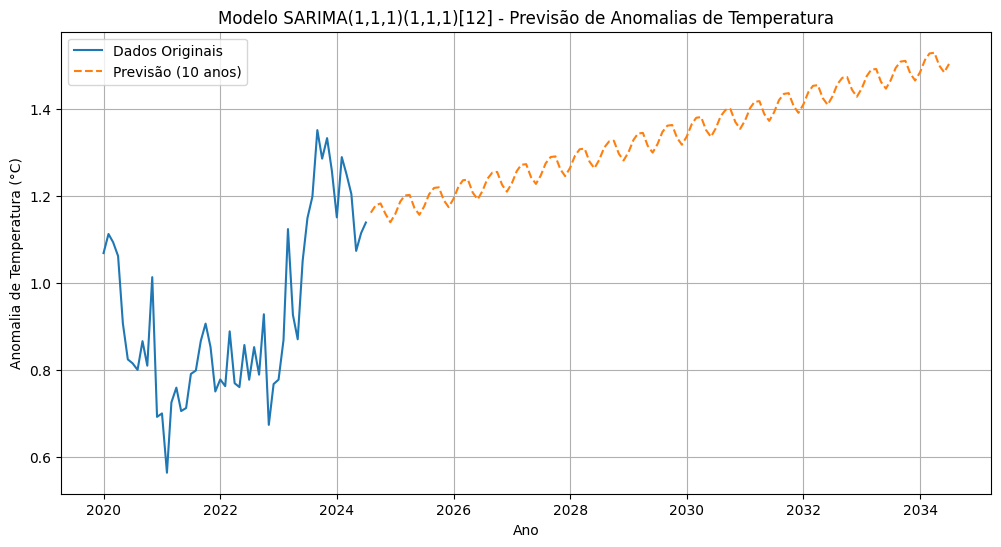

In [ ]:
filtro = df[df.index.year >= 2020]

plt.figure(figsize=(12, 6))
plt.plot(filtro.index, filtro["Mean"], label="Dados Originais")
plt.plot(forecast.index, forecast, label="Previsão (10 anos)", linestyle="--")
plt.title("Modelo SARIMA(1,2,1)(1,1,1)[6] - Previsão de Anomalias de Temperatura")
plt.xlabel("Ano")
plt.ylabel("Anomalia de Temperatura (°C)")
plt.legend()
plt.grid()
plt.show()


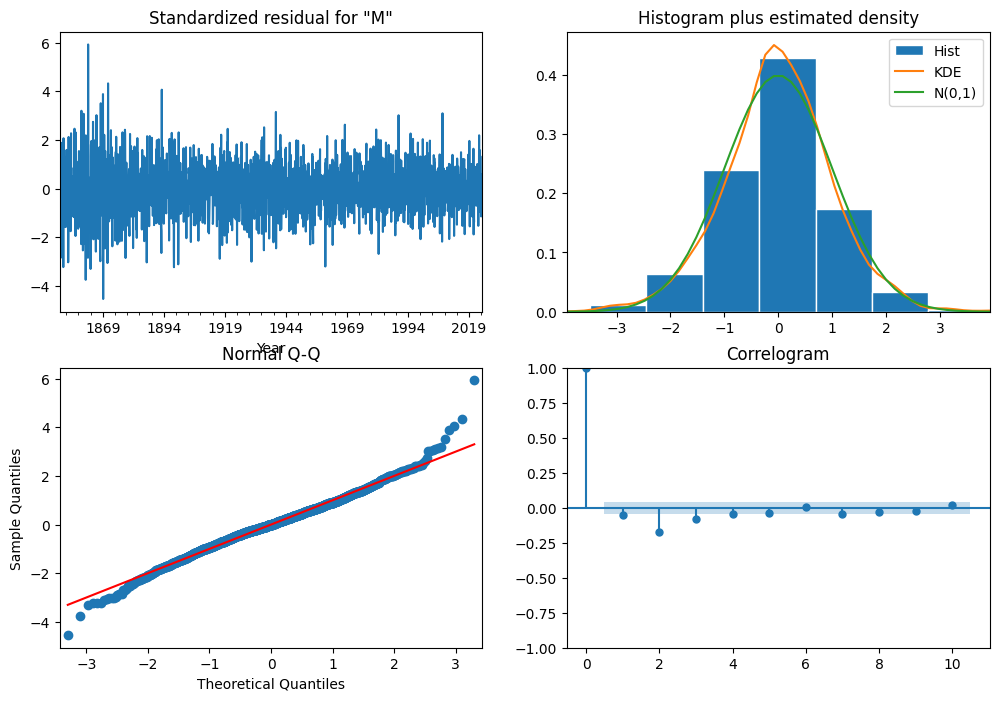

In [ ]:
sarima_results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Resíduos

In [ ]:
residuals = sarima_results.resid

In [ ]:
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)

if p_value > 0.05:
    print("Os resíduos são normalmente distribuídos.")
else:
    print("Os resíduos não são normalmente distribuídos.")

Os resíduos não são normalmente distribuídos.


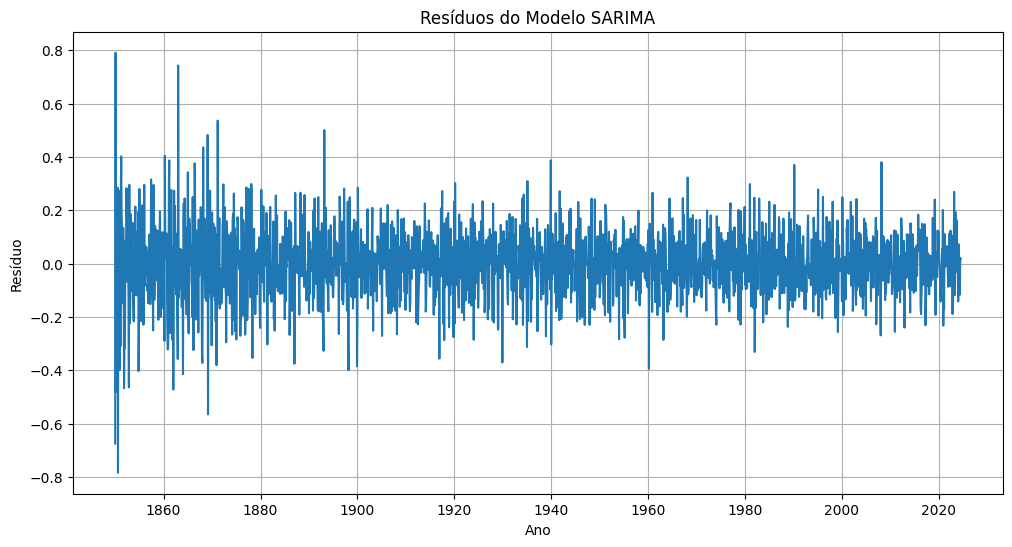

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Resíduos do Modelo SARIMA")
plt.xlabel("Ano")
plt.ylabel("Resíduo")
plt.grid()
plt.show()

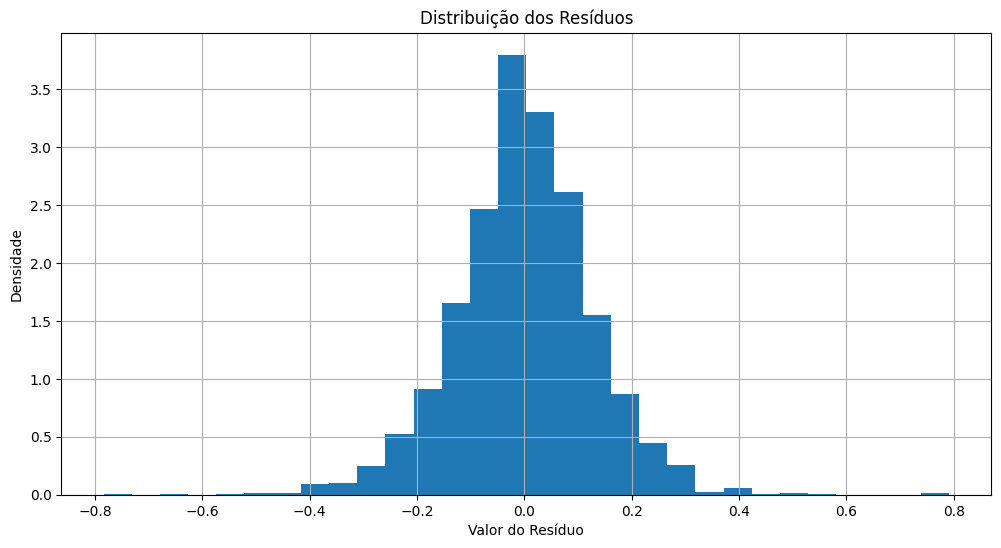

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, density=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Valor do Resíduo")
plt.ylabel("Densidade")
plt.grid()
plt.show()